# Analysis of Comcast Telecom Consumer Complaints

## Description:

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. In October 2016, the authority fined them a $2.3 million, after receiving over 1000consumer complaints. The existing database will serve as a repository of public customer complaints filed against Comcast. It will help to pin down what is wrong with Comcast's customer service. 

**Data Dictionary:** 

Ticket #: Ticket number assigned to each complaint 

Customer Complaint: Description of complaint 

Date: Date of complaint 

Time: Time of complaint 

Received Via: Mode of communication of the complaint 

City: Customer city 

State: Customer state 

Zipcode: Customer zip 

Status: Status of complaint 

Filing on behalf of someone

## Approach:

The complaints will be sorted out based on various domains like internet, billing, network, etc. to analyze which domain was facing large number of complaints and how many of those were successfully resolved by the company. The state wise analysis of the complaints will also be covered. The cleaning of the data will be done using some of the ‘NLP’ (Natural Language Processing) libraries and the results will be visualized using ‘matplotlib’ and ‘seaborn’ libraries.

In [11]:
#We will first import the necessary libraries then load the dataset and check the datatypes of each variable.
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import datetime
import calendar

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
%matplotlib inline

import nltk
from nltk.corpus import stopwords
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [2]:
comcast=pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [3]:
comcast=pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


We will process the Date variable in our further analysis. Therefore, it is better to have it in datetime format. We will use *‘datetime’* library for this.

In [5]:
comcast['Date']=pd.to_datetime(comcast['Date'])
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

Now we can proceed to check for the presence of missing or null values.

In [6]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
for i in comcast.columns:
    print(comcast[i].value_counts())

240608    1
272685    1
311271    1
359596    1
243193    1
         ..
303352    1
368787    1
362921    1
352492    1
261499    1
Name: Ticket #, Length: 2224, dtype: int64
Comcast                                                            83
Comcast Internet                                                   18
Comcast Data Cap                                                   17
comcast                                                            13
Data Caps                                                          11
                                                                   ..
Comcast Overpricing                                                 1
COMCAST SERVICE                                                     1
Shady Internet Billing Practices from Comcast                       1
paying for hi speed internet 105 mbps                               1
Recurring Comcast service issues and long waits for non-service     1
Name: Customer Complaint, Length: 1841, dtype: int64
20

## To have a better understanding of the variation of no. of complaints on various days we will plot the trend chart for number of complaints on daily and monthly granularity levels.

In [12]:
comcast.Date.describe()

count                    2224
unique                     91
top       2015-06-24 00:00:00
freq                      218
first     2015-04-01 00:00:00
last      2015-06-30 00:00:00
Name: Date, dtype: object

The data is recorded from 1st April 2015 to 30th June 2015. We will first inspect the monthly view of the number of complaints. The ticket number for each complaint must be unique. Therefore, we will group the number of tickets raised in each month using *‘groupby’* function.

In [13]:
monthly_view=pd.DataFrame(comcast['Ticket #'].groupby(comcast.Date.dt.month).count())
monthly_view.reset_index(inplace=True)
monthly_view

,Date,Ticket #
0,4,545
1,5,399
2,6,1280


**We can infer that the highest number of complaints (1280) were raised in the in the month of June followed by April and May. We can visualize the results as well.**

In [18]:
monthly_view.rename(columns={"Ticket #":'Number_of_complaints'},inplace=True)
for i in range (len(monthly_view['Date'])):
    monthly_view.loc[i,'Month']=calendar.month_name[monthly_view.loc[i,'Date']]
del monthly_view['Date']
monthly_view

,Number_of_complaints,Month
0,545,April
1,399,May
2,1280,June


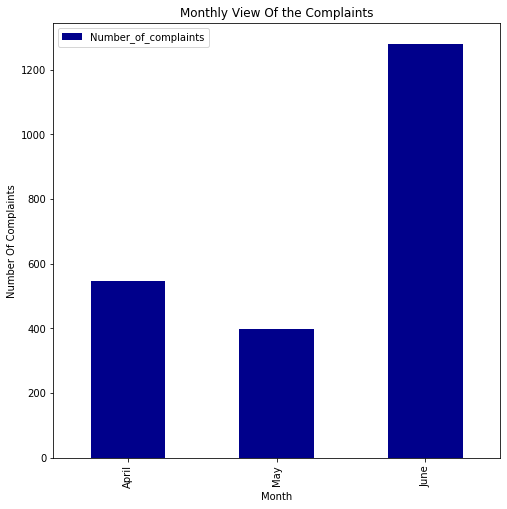

In [22]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
monthly_view.plot.bar(color='Darkblue',figsize=(8,8))
plt.xticks(np.arange(0,3,1),monthly_view.Month)
plt.xlabel('Month')
plt.ylabel('Number Of Complaints')
plt.title('Monthly View Of the Complaints')
plt.savefig('monthly_view.png')

We can directly visualize above results using ‘countplot’ plot in ‘seaborn’ library and with the help of ‘datetime’ library (to strip out the month parameter from the ‘Date’ variable).

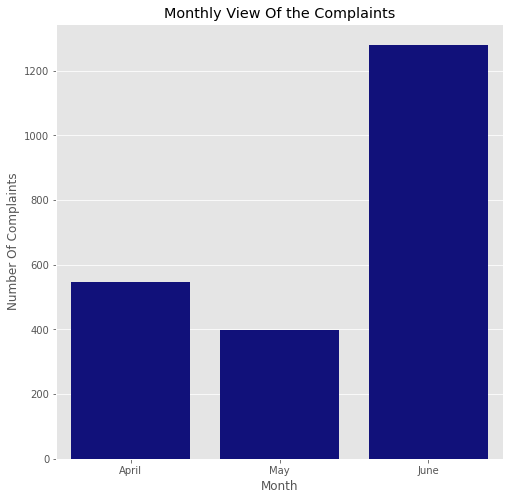

In [23]:
style.use('ggplot')
plt.figure(figsize=(8,8))
sns.countplot(comcast.Date.dt.month,color='darkblue')
plt.xticks(np.arange(0,3,1),monthly_view.Month)
plt.xlabel('Month')
plt.ylabel('Number Of Complaints')
plt.title('Monthly View Of the Complaints')
plt.show()

Now, we will inspect daily view of the number of complaints by grouping number of tickets in each day and then visualize the results using seaborn library. As there are many values of dates, so instead of plotting bar chart, we will plot line chart.

In [24]:
daily_view=pd.DataFrame(comcast['Ticket #'].groupby(comcast.Date).count())
daily_view.reset_index(inplace=True)

In [25]:
daily_view.rename(columns={'Ticket #':'Count'},inplace=True)
daily_view.Date=pd.to_datetime(daily_view.Date)
print('Maximum number of complaints:\n',daily_view[daily_view['Count']==daily_view['Count'].max()])
daily_view

Maximum number of complaints:
          Date  Count
84 2015-06-24    218


,Date,Count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


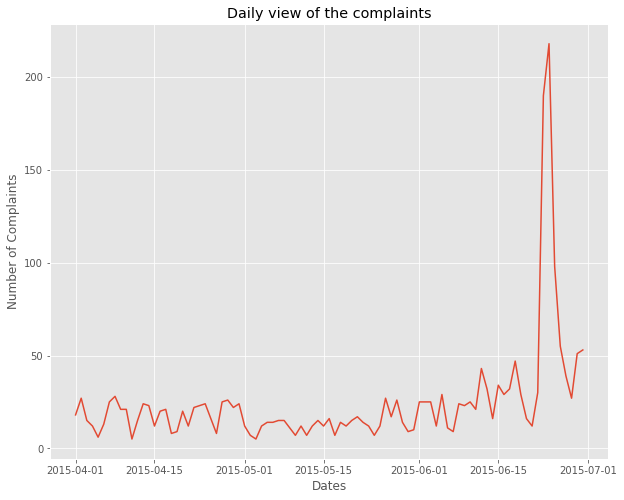

In [26]:
style.use('ggplot')
plt.figure(figsize=(10,8))
sns.lineplot(daily_view.Date,daily_view.Count)
plt.xlabel('Dates')
plt.ylabel('Number of Complaints')
plt.title('Daily view of the complaints')
plt.show()

**We can see the trend chart for number of complaints on daily basis. Highest number of complaints were raised between 15th to 30th June. Overall, the number of complaints in the month of June was approximately more than 4 times that of in the month of April and May.**

## These trend charts encourage us to look into, and group the complaints into different types like- Network based, Internet based, Billing based, Refund based, Service Based and Other than all these types of complaints.

The complaints will be grouped based on the keywords corresponding to each complaint type. For example, in case of internet based complaints, the keyword is ’internet’, for billing base complaints, the keyword is ‘bill’, etc.

However, for efficient grouping of the complaints based on the keywords, we must clean the data in ‘Customer Complaint’ variable. Here, cleaning refers to the removal of stopwords (words that are commonly used in English language) and conversion of each word into its root word e.g. ‘billing’ will be converted into ‘bill’, etc. To do so, we will use NLP libraries- ‘string’, ’nltk’

In [28]:
customer_complaint=comcast['Customer Complaint']
customer_complaint

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [29]:
import nltk
from nltk.corpus import stopwords
import string
customer_complaint.describe()

count        2224
unique       1841
top       Comcast
freq           83
Name: Customer Complaint, dtype: object

In [30]:
def complaintprocess(complaint):
    no_punctuation="".join([char for char in complaint if char not in string.punctuation])
    no_stopwords=" ".join([word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')])
    clean_data=" ".join([lem.lemmatize(word) for word in no_stopwords.split()])
    return clean_data

In [31]:
clean_data=comcast['Customer Complaint'].apply(complaintprocess)
clean_data

0                           Comcast Cable Internet Speeds
1              Payment disappear service got disconnected
2                                           Speed Service
3       Comcast Imposed New Usage Cap 300GB punishes s...
4                            Comcast working service boot
                              ...                        
2219                                 Service Availability
2220               Comcast Monthly Billing Returned Modem
2221                                    complaint comcast
2222               Extremely unsatisfied Comcast customer
2223                  Comcast Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [32]:
internet_complaint=list()
billing_complaint=list()
charges_complaint=list()
refund_complaint=list()
email_complaint=list()
network_complaint=list()
service_complaint=list()
other=list()
for i in clean_data:
    if 'internet' in i.lower():
        internet_complaint.append(i)
    elif 'bill' in i.lower():
        billing_complaint.append(i)
    elif 'charges' in i.lower():
        charges_complaint.append(i)
    elif 'refund' in i.lower():
        refund_complaint.append(i)
    elif 'email' in i.lower():
        email_complaint.append(i)
    elif 'disconnect' in i.lower():
        network_complaint.append(i)
    elif 'service' in i.lower():
        service_complaint.append(i)
    else:
        other.append(i)
complaint_types={'Internet_based_complaints':len(internet_complaint),'Billing_based_complaints':len(billing_complaint),
                'Charges_based_complaints':len(charges_complaint),'Refund_based_complaints':len(refund_complaint),
                'Email_based_complaints':len(email_complaint),'Network_based_complaints':len(network_complaint),
                'Services_based_complaints':len(service_complaint),'Other_complaints':len(other)}
print('Other complaints have maximum frequency after which internet based complaints have higher frequency')
complaint_types

Other complaints have maximum frequency after which internet based complaints have higher frequency


{'Internet_based_complaints': 532,
 'Billing_based_complaints': 333,
 'Charges_based_complaints': 30,
 'Refund_based_complaints': 13,
 'Email_based_complaints': 18,
 'Network_based_complaints': 11,
 'Services_based_complaints': 270,
 'Other_complaints': 1017}

Thus, we have successfully grouped the complaints and can conclude that apart from other types of complaints, highest complaints were based upon internet issues, followed by billing and service related issues.

## Though the number of complaints were high but it is necessary to study that how many of those complaints were resolved by the company.

We will split the complaints based on their status as ‘Closed’ and ‘Open’. The ‘Status’ variable in the dataset indicates the status of the complaints. There are four possibilities of the status variable- open, closed, solved and pending. We will create another variable as ‘Updated_status’ which will indicate the status of the complaint as either open or close. For this, we will combine open and pending complaints into a single group of open complaints and closed and solved into a group of closed complaints.

In [33]:
comcast['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [34]:
comcast['Updated_Status']=comcast.loc[:,'Status']
for i in range (len(comcast['Status'])):
    if ((comcast['Status'][i]=='Open') | (comcast['Status'][i]=='Pending')):
        comcast.loc[i,'Updated_Status']='Open'
    elif ((comcast['Status'][i]=='Closed') | (comcast['Status'][i]=='Solved')):
        comcast.loc[i,'Updated_Status']='Closed'
print(comcast['Updated_Status'].value_counts())
comcast.head()

Closed    1707
Open       517
Name: Updated_Status, dtype: int64


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Updated_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


**As we have new status of the complaints, now we will get a state wise status of the complaints and will investigate which state had highest number of unresolved complaints. The best way to investigate this is to plot a staked bar char for each state indicating the number of open and closed complaints.** 

The groupby function will help to count the number of open and closed complaints in each state and make it easier to plot the stacked bar chart.

In [35]:
state_count=comcast.groupby(comcast['State']).size().sort_values(ascending=False).to_frame().reset_index().rename({0:'Count'}
                                                                                                                  ,axis=1)
state_count.head()

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


**Thus, the highest number of complaints (288) were in state ‘Georgia’. We can get detail view of the status of the complaints using stacked bar chart.**

In [36]:
complaint_status=comcast.groupby(['State','Updated_Status']).size().unstack().fillna(0)
complaint_status.reset_index(inplace=True)
complaint_status.head()

Updated_Status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


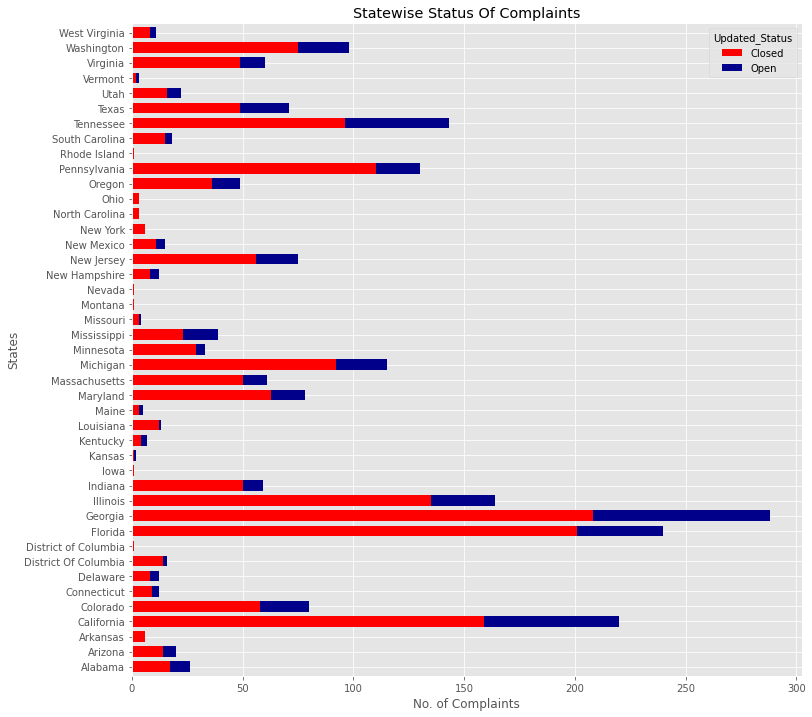

In [43]:
complaint_status.plot(kind='barh',figsize=(12,12),stacked=True,width=0.7,color=['red','darkblue'])
plt.yticks(np.arange(0,43,1),complaint_status.State)
plt.ylabel('States')
plt.xlabel('No. of Complaints')
plt.title('Statewise Status Of Complaints')
plt.savefig('state_.png')

**The highest number of closed complaints and the highest number of open complaints were also from the same state, Georgia. Whereas, Rhode Island, Nevada, Montana and Iowa had no complaints.**

**From the graph we can see that no complaint from Kansas were resolved. Though, the number of complaints in that state was very few but fewest of them were resolved.**

## The stacked bar gives an overall idea of the status of the complaints in various states. We can get better knowledge about the percentage of complaints that remain unresolved through a pie chart

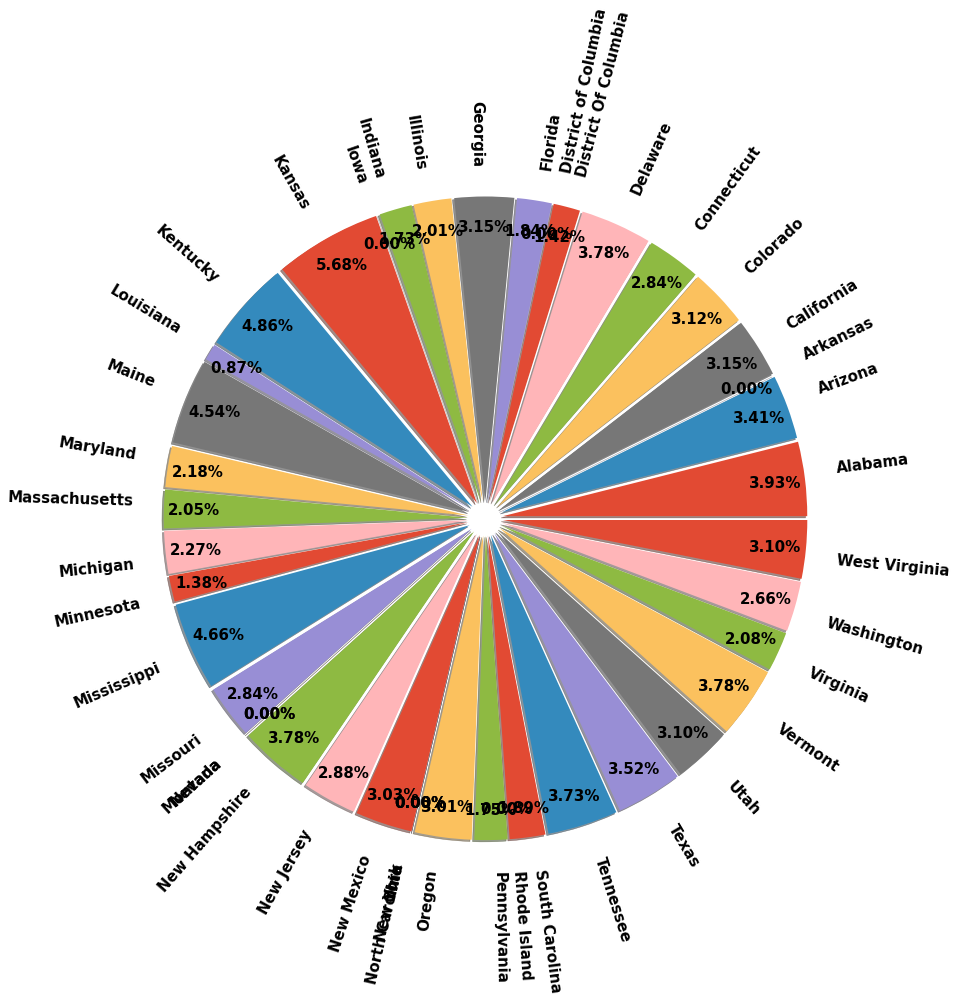

In [71]:
complaint_status['Total_complaints']=complaint_status['Open']+complaint_status['Closed']
complaint_status['Percentage_of_unresolved_complaints']=round(((complaint_status['Open']/complaint_status['Total_complaints'])
                                                               *100),2)
explode=(np.ones(len(complaint_status))*0.2)
plt.pie(complaint_status.Percentage_of_unresolved_complaints,labeldistance=1.1,pctdistance=0.9,  rotatelabels=True, 
        textprops=dict(size=15,weight='bold'), labels=complaint_status.State,autopct='%1.2f%%',radius=3.5,shadow=True,explode=explode)
plt.savefig('percent_complaint.png')

**As mentioned in previous section, the number of complaints in Kansas were few but none of them were resolved. This made the state with highest unresolved complaints, contributing 5.68% of the total number of unresolved complaints.**

**After Kansas, the second state with highest number of unresolved complaints was Kentucky, contributing 4.86% to the total number of unresolved complaints, followed by the state ‘Mississippi’ and ‘Maine’ contributing 4.66% and 4.54% respectively to the total number of unresolved complaints.**

**From these insights, and from previous stacked bar chart, we can conclude that the states having lesser number of complaints were quite ignored by the company. Which may have caused one of the reasons for its reputation of ‘terrible customer service’.**

**On the other hand, in previous section we concluded that the highest number of complaints were in state ‘Georgia’. From above pie chart, we can say that though the number of complaints were high in Georgia, the number of resolved complaints was also quite good, in comparison to other states.**

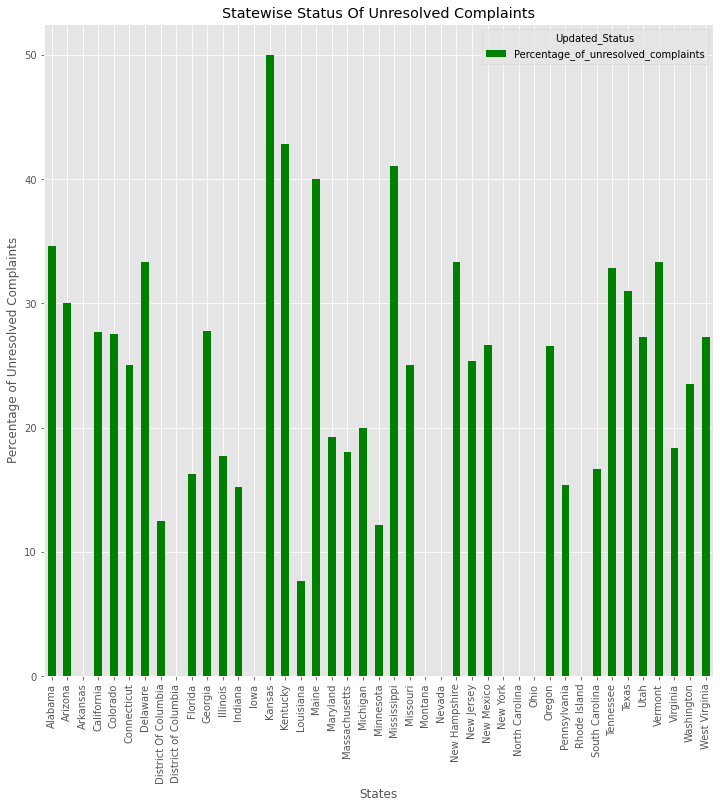

In [72]:
style.use('ggplot')
df2=complaint_status.drop(['Open','Closed','Total_complaints'],axis=1)
df2.plot.bar(color='green',figsize=(12,12))
plt.xlabel('States')
plt.ylabel('Percentage of Unresolved Complaints')
plt.title('Statewise Status Of Unresolved Complaints')
plt.xticks(np.arange(0,43,1),complaint_status.State)
plt.savefig('Unresolved_complaints.png')

This graph provides the total percentage of unresolved complaints out of total number of complaints in each state. It shows that the **state Kansas (50%), Kentucky (45-40%), Mississippi (43-40%) and Maine (40%) had highest percentages of unresolved complaints. The value 50% in case on Kansas indicates that, the company managed to resolve only 50% of the total number of complaints in that state.**

## After the discussion of types of complaints and their numbers in various states we should also look forward to the mode of communication of the complaint

The ‘value_counts()’ command on ‘Received Via’ variable will provide the different values possessed by the variable and their corresponding count.

In [73]:
comcast['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

Now we will group the complaints based of the mode of communication of the complaint and based on status of complaint. We will utilize the newly created ‘Updated_status’ variable for this purpose.

In [74]:
df=pd.DataFrame(comcast.groupby(['Updated_Status','Received Via']).size().unstack())
df

Received Via,Customer Care Call,Internet
Updated_Status,,
Closed,864,843
Open,255,262


Text(0.5, 1.0, 'Status of Complaints Received Via Customer Care Call and Internet')

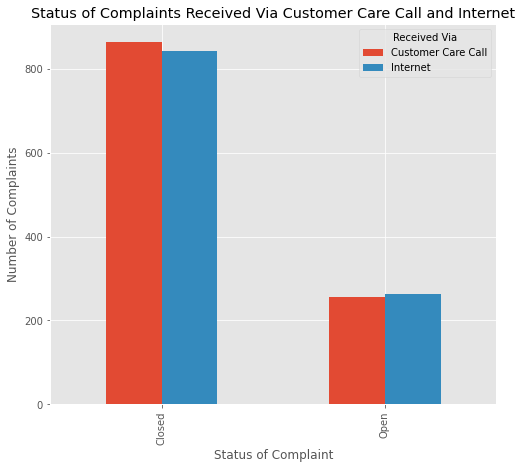

In [75]:
df.plot.bar(figsize=(8,7))
plt.xlabel('Status of Complaint')
plt.ylabel('Number of Complaints')
plt.title('Status of Complaints Received Via Customer Care Call and Internet')

**Above graph indicates the number of complaints received through the two modes of communication- open and closed and the status of complaints received through these modes.**

**The graph suggests that the company handled the complaints received through both the modes of communication equally. However, there is slight difference between the two, which can be evaluated by calculation of percentages of complaints resolved through the two modes of communication.**

To do this, we first transform rows into columns for the sake of ease of calculation with the help of ‘transpose or T’ command and then we will determine the percentage of complaints resolved through each mode.

In [76]:
df=df.T
df['Total_Complaints_Received']=df['Closed']+df['Open']
df['Percentage_of_complaints_resolved']=round((df['Closed']/df['Total_Complaints_Received'])*100,2)
df

Updated_Status,Closed,Open,Total_Complaints_Received,Percentage_of_complaints_resolved
Received Via,,,,
Customer Care Call,864,255,1119,77.21
Internet,843,262,1105,76.29


In [77]:
df1=df.drop(['Closed','Open','Total_Complaints_Received'],axis=1)
df1

Updated_Status,Percentage_of_complaints_resolved
Received Via,
Customer Care Call,77.21
Internet,76.29


**Thus, the two percentages are almost equal. Which suggests that the complaints that were resolved were independent of mode of communication of the complaint.**

We can visualize the results as well.

Text(0.5, 1.0, 'percentage of complaints resolved till date, which were received through the Internet and customer care calls')

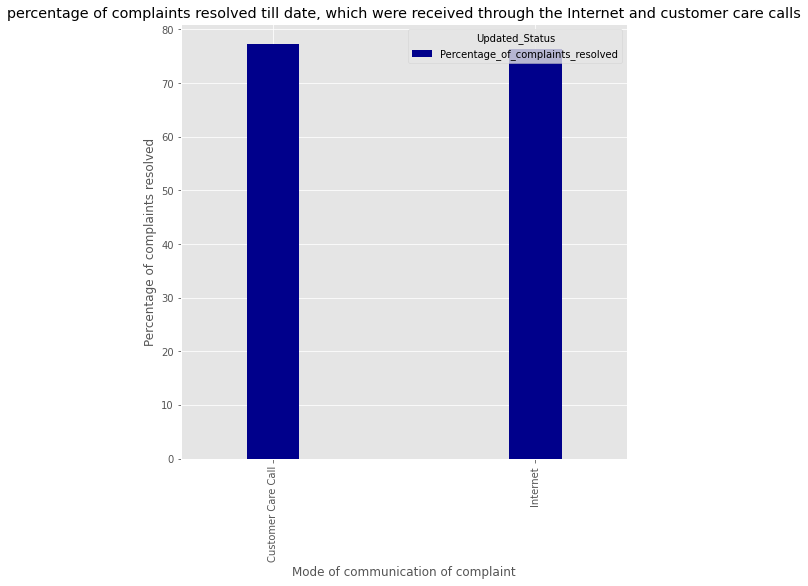

In [78]:
df1.plot.bar(figsize=(8,8),width=0.2,color='Darkblue')
plt.xlabel('Mode of communication of complaint')
plt.ylabel('Percentage of complaints resolved')
plt.title('percentage of complaints resolved till date, which were received through the Internet and customer care calls')

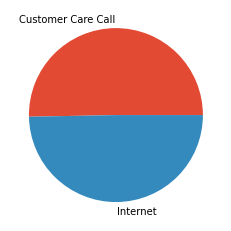

In [79]:
plt.pie(df.Percentage_of_complaints_resolved,labels=['Customer Care Call','Internet'])
plt.show()

# Conclusion:

**1. In conclusion, we have analyzed the customer complaint data of Comcast Company, in which, first we understood the data and have examined the trend chart of number of customer complaints on daily and monthly granularity levels and arrived at a conclusion that the complaints were highest in between 15th to 30th June.**

**2. Then we have grouped the complaints into various types like internet-based complaints, network-based complaints, refund-based complaints, etc. Out of which, internet based complaints were highest in number followed by billing and service based complaints.**

**3. Then we created a new variable-‘Updated_status’ with values as ‘Open’ and ‘Closed’ and determine state wise status of complaints and concluded that the state ‘Georgia’ had highest number of complaints of 288.**

**4. We have used various visualization techniques to study the percentage of unresolved complaints in various states. From that study, we deduced that the states that had comparatively lesser number of complaints were quite ignored by the company. This might be one of the problems of ‘terrible customer service’ of the company.**

**5. At last, we investigated the relation between modes of communication of complaints and the percentage of unresolved complaints which inferred that there was no relation between the percentage of unresolved complaints and the mode of communication of the complaints.**

**6. Thinking about solution, the company must have looked into the internet and billing services. Mostly in the month of June.**